In [2]:
import pandas as pd #Libreria para leer el dataset.
import matplotlib.pyplot as plt #Libreria para crear gráficas
from sklearn.preprocessing import StandardScaler #Libreria para hacer estandarización.
from sklearn.model_selection import train_test_split #Libreria para dividir el conjunto en prueba y entrenamiento.
from sklearn.neural_network import MLPClassifier #Libreria del modelo de clasificacion
from sklearn.metrics import ConfusionMatrixDisplay #Librerias para la creación e impresión de la matriz de confusión.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [24]:
#Recibir el dataset 
Data = pd.read_csv("dataset_covid.csv")
Data.head()

,ORIGEN,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI,MURIO
0,1,1,2,1,1,66,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,1,1
1,1,1,2,2,1,33,2,98,98,98,98,98,1,98,98,98,98,99,2,97,2,97,6,2,1
2,1,2,2,1,1,60,97,2,2,2,2,2,2,2,2,2,1,99,1,2,2,97,7,2,1
3,1,2,2,2,1,58,97,1,2,2,2,1,2,1,2,1,2,2,1,1,2,97,3,2,1
4,1,1,2,2,1,30,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,97,3,2,1


# Tratamiento de datos.
En esta parte realizamos el manejo de datos, con el fin de garantizar buenos resultados por parte de nuestro algoritmo, para eso hay muchos procedimientos, en nuestro caso, optamos por el método llamado "Codificación de destino" o "Codificación guiada", el cual consiste en cambiar los datos por etiquetas, estas etiquetas representaran la probabilidad (en nuestro caso) de la relación entre morir y cada una de las características del dataset (a excepción de 4, que consideramos una poca relación).

In [5]:
#Primero, realizamos un arreglo con los encabezados a los cuales se les aplicará el método.
columnas = ['ORIGEN', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 
            'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO_LAB', 'RESULTADO_ANTIGENO', 
            'CLASIFICACION_FINAL', 'UCI']

#Este ciclo, nos ayuda a realizar el proceso, para cada uno de las etiquetas
for j in columnas:
    Encoded_labels=Data.groupby([j])['MURIO'].mean().sort_values().index #Esta linea agarra la primera caracteristica y saca la probabilidad con respecto a 
                                                                         # la etiqueta "murio"
    #A su vez, acomoda de menor a mayor las probabilidades que arroja.
    Encoded_labels_ranks = { k:i for i, k in enumerate(Encoded_labels, 0) } #Esta linea simplemente asigna una etiqueta numérica según 
    #la cantidad de valores iniciales, arranca del 0.
    a=j+'_E'#Solo le cambia hace referencia a que se realizó el ajuste, en el nombre de la nueva columna.
    Data[a]= Data[j].map(Encoded_labels_ranks) #Crea una nueva columna, con los valores resultantes de la asignación de etiqueta.
    Data = Data.drop(j, axis = 1) #Elimina la columna inicial, para que solo se use la ya tratada.
Data.head() #Imprime el dataset con las nuevas columnas.

,SEXO,EDAD,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,MURIO,ORIGEN_E,TIPO_PACIENTE_E,INTUBADO_E,NEUMONIA_E,EMBARAZO_E,DIABETES_E,EPOC_E,ASMA_E,INMUSUPR_E,HIPERTENSION_E,OTRA_COM_E,CARDIOVASCULAR_E,OBESIDAD_E,RENAL_CRONICA_E,TABAQUISMO_E,OTRO_CASO_E,RESULTADO_LAB_E,RESULTADO_ANTIGENO_E,CLASIFICACION_FINAL_E,UCI_E
0,1,66,2,2,1,0,1,3,2,2,1,0,1,0,1,0,0,1,0,0,0,0,2,6,1
1,1,33,2,2,1,0,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,0,2,0,2
2,2,60,1,2,1,0,1,3,2,3,0,0,1,0,0,0,0,0,0,1,1,1,2,2,2
3,2,58,1,2,1,0,1,2,2,3,1,0,1,0,1,0,1,0,1,0,2,3,2,5,2
4,1,30,1,2,1,0,1,2,2,2,0,0,1,0,0,0,0,0,1,0,2,3,2,5,2


In [6]:
#En esta celda, unicamente acomodamos el dataset, dejando al último la clase (MURIO).
Data = Data.reindex(columns=['ORIGEN_E','SEXO','TIPO_PACIENTE_E', 'INTUBADO_E', 'NEUMONIA_E','EDAD','EMBARAZO_E', 'DIABETES_E', 'EPOC_E', 'ASMA_E', 
                             'INMUSUPR_E', 'HIPERTENSION_E', 'OTRA_COM_E', 'CARDIOVASCULAR_E', 'OBESIDAD_E', 'RENAL_CRONICA_E', 'TABAQUISMO_E', 'OTRO_CASO_E', 
                             'TOMA_MUESTRA_LAB','RESULTADO_LAB_E','TOMA_MUESTRA_ANTIGENO' ,'RESULTADO_ANTIGENO_E', 'CLASIFICACION_FINAL_E', 'UCI_E','MURIO'])
Data.head()

,ORIGEN_E,SEXO,TIPO_PACIENTE_E,INTUBADO_E,NEUMONIA_E,EDAD,EMBARAZO_E,DIABETES_E,EPOC_E,ASMA_E,INMUSUPR_E,HIPERTENSION_E,OTRA_COM_E,CARDIOVASCULAR_E,OBESIDAD_E,RENAL_CRONICA_E,TABAQUISMO_E,OTRO_CASO_E,TOMA_MUESTRA_LAB,RESULTADO_LAB_E,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO_E,CLASIFICACION_FINAL_E,UCI_E,MURIO
0,0,1,1,3,2,66,2,1,0,1,0,1,0,0,1,0,0,0,2,0,2,2,6,1,1
1,0,1,1,2,2,33,2,2,2,2,2,2,1,2,2,2,2,1,2,0,2,2,0,2,1
2,0,2,1,3,2,60,3,0,0,1,0,0,0,0,0,0,1,1,1,1,2,2,2,2,1
3,0,2,1,2,2,58,3,1,0,1,0,1,0,1,0,1,0,2,1,3,2,2,5,2,1
4,0,1,1,2,2,30,2,0,0,1,0,0,0,0,0,1,0,2,1,3,2,2,5,2,1


In [7]:
#Asignación de el conjunto de características (X) y las etiquetas (clases, y). 
X=Data.iloc[:,0:24]
y=Data.iloc[:,24]
print(y[:5])

   ORIGEN_E  SEXO  ...  CLASIFICACION_FINAL_E  UCI_E
0         0     1  ...                      6      1
1         0     1  ...                      0      2
2         0     2  ...                      2      2
3         0     2  ...                      5      2
4         0     1  ...                      5      2

[5 rows x 24 columns]
0    1
1    1
2    1
3    1
4    1
Name: MURIO, dtype: int64


In [8]:
#Divide en conjuntos de prueba y entrenamiento el dataset. Queda con un porcentaje 70 (entrenamiento) y 30 (prueba).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Estandarizacion. Esto hace referencia a el ajuste de los numeros, con el fin de tener a todos en un estandar y mejorar el
#trabajo del algoritmo
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# MLPClassifier()
Para este proyecto se nos pidió usar la técnica MLPClassifier para la clasificación y predicción, esta técnica se basa en el modelo perceptrón multicapa, visto en clase, en el cual, convierte cada instancia del dataset en capas conectadas entre sí. Cada capa contiene características a los cuales se le asignan pesos iniciales, los cuales por cada época de entrenamiento se ajustan en busca de patrones y pesos que arrojen resultados correctos.
Las épocas de entrenamiento van de la mano de 2 funciones, de núcleo (g(x,w)) y de activación ((f(g)) con estas 2 funciones obtenemos una salida (y) la cual, según se compare con la etiqueta real (columna MURIO), determinará si los pesos deben actualizarse o no.
A continuación: 4 modelos para la predicción de muertes por covid.

In [9]:
modelo=MLPClassifier(random_state=42,max_iter=1000, solver='adam', shuffle=True)
# random_state: generación de números aleatorios para las ponderaciones y la inicialización de sesgo
# max_iter: máximo de iteraciones
# solver: optimizador 
# shuffle: mezclar muestras en cada iteración
modelo.fit(X_train, y_train)
modelo.fit(X_test, y_test)

# Creacion del modelo 2
modelo_2=MLPClassifier(random_state=84,max_iter=1500, solver='adam', shuffle=True)
modelo_2.fit(X_train, y_train)
modelo_2.fit(X_test, y_test)

# Creacion del modelo 3
modelo_3=MLPClassifier(random_state=36,max_iter=1500, solver='adam', learning_rate_init=0.005, shuffle=True)
# learning_rate: tasas de aprendizaje para actualizaciones de peso
modelo_3.fit(X_train, y_train)
modelo_3.fit(X_test, y_test)

# Creacion del modelo 4
modelo_4=MLPClassifier(random_state=21,max_iter=1000, solver='adam', learning_rate_init=0.010, shuffle=False)
modelo_4.fit(X_train, y_train)
modelo_4.fit(X_test, y_test)

MLPClassifier(learning_rate_init=0.01, max_iter=1000, random_state=21,
              shuffle=False)

# Métricas de evaluación.
Para evaluar nuestros modelos y checar los resultados, se nos pidieron 3 métricas diferentes; la primera, la exactitud, la cual se encarga de mostrar numéricamente la cantidad de predicciones positivas correctas, la segunda, F1-score o sea una puntuación sobre las etiquetas (clases) del dataset, que se basa en una operación matemática entre otras dos métricas (exactitud y exhaustividad), y la tercera la matriz de confusión, que nos mostrará de manera gráfica: Los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos.
El equipo decidió, mostrar la exactitud y matriz de confusión para los conjuntos de prueba como de entrenamiento.

***Exactitud:  0.975 ***
***Exactitud entrenamiento:  0.919 ***
Valor F1 0.9746666666666667


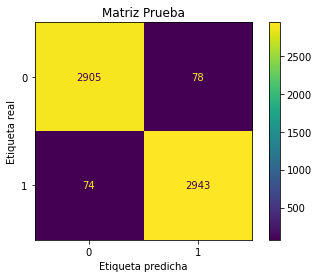

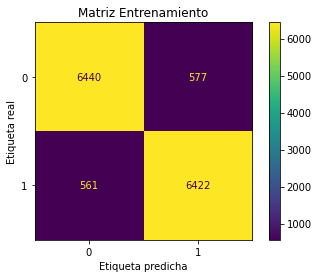

In [20]:
# Evaluacion del modelo 1
accuracy=round(modelo.score(X_test, y_test),3)
print("***Exactitud: ",accuracy,"***")#Impresión y calculo de la exactitud de prueba
accuracy=round(modelo.score(X_train, y_train),3)
print("***Exactitud entrenamiento: ",accuracy,"***")#Impresión y calculo de la exactitud de entrenamiento
y_pred = modelo.predict(X_test) #El modelo predice las nuevas etiquetas que debe tener el conjunto de prueba.
print('Valor F1', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_) #Calcula la matriz de confusión pasandole como parametro
#las nuevas y las primeras etiquetas del conjunto de prueba. Además de la lista de etiquetas con las que trabaja el 
#clasificador 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo.classes_)#Dibuja la matriz.
disp.plot(values_format = '')
plt.title('Matriz Prueba')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
#Repite proceso para la matriz de confusión del conjunto de entrenamiento.
y_pred_train = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train, labels=modelo.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=modelo.classes_)
disp_train.plot(values_format = '')
plt.title('Matriz Entrenamiento')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()#Imprime las matrices

***Exactitud:  0.973 ***
***Exactitud entrenamiento:  0.918 ***
Valor F1 0.9746666666666667


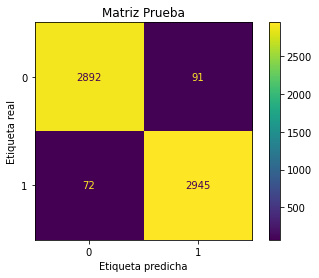

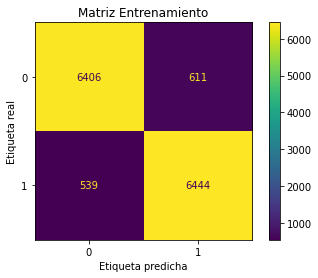

In [21]:
# Evaluación del modelo 2
accuracy=round(modelo_2.score(X_test, y_test),3)
print("***Exactitud: ",accuracy,"***")
accuracy=round(modelo_2.score(X_train, y_train),3)
print("***Exactitud entrenamiento: ",accuracy,"***")
print('Valor F1', f1_score(y_test, y_pred, average='micro'))
y_pred = modelo_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=modelo_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_2.classes_)
disp.plot(values_format = '')
plt.title('Matriz Prueba')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
y_pred_train = modelo_2.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train, labels=modelo_2.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=modelo_2.classes_)
disp_train.plot(values_format = '')
plt.title('Matriz Entrenamiento')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

***Exactitud:  0.973 ***
***Exactitud entrenamiento:  0.917 ***
Valor F1 0.9728333333333333


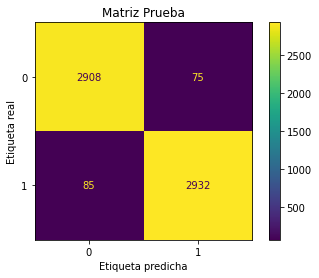

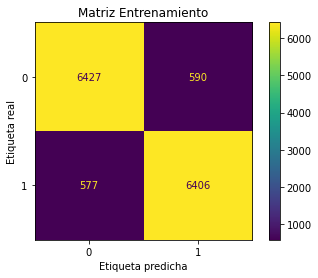

In [22]:

# Evaluación del modelo 3
accuracy=round(modelo_3.score(X_test, y_test),3)
print("***Exactitud: ",accuracy,"***")
accuracy=round(modelo_3.score(X_train, y_train),3)
print("***Exactitud entrenamiento: ",accuracy,"***")
print('Valor F1', f1_score(y_test, y_pred, average='micro'))
y_pred = modelo_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=modelo_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_3.classes_)
disp.plot(values_format = '')
plt.title('Matriz Prueba')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
y_pred_train = modelo_3.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train, labels=modelo_3.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=modelo_3.classes_)
disp_train.plot(values_format = '')
plt.title('Matriz Entrenamiento')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

***Exactitud:  0.976 ***
***Exactitud entrenamiento:  0.915 ***
Valor F1 0.9733333333333334


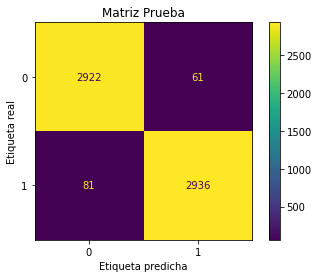

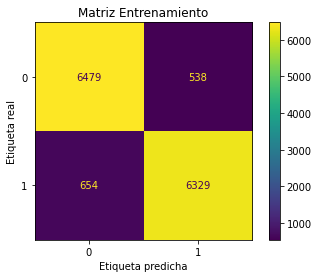

In [23]:
# Evaluación del modelo 4
accuracy=round(modelo_4.score(X_test, y_test),3)
print("***Exactitud: ",accuracy,"***")
accuracy=round(modelo_4.score(X_train, y_train),3)
print("***Exactitud entrenamiento: ",accuracy,"***")
print('Valor F1', f1_score(y_test, y_pred, average='micro'))
y_pred = modelo_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=modelo_4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_4.classes_)
disp.plot(values_format = '')
plt.title('Matriz Prueba')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
y_pred_train = modelo_4.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train, labels=modelo_4.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=modelo_4.classes_)
disp_train.plot(values_format = '')
plt.title('Matriz Entrenamiento')
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()